In [2]:
dataset_path = "/Users/ramith/Datasets/classification-of-heart-sound-recordings-the-physionet-computing-in-cardiology-challenge-2016-1.0.0"

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import os
import random
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import wfdb
from pydub import AudioSegment
import wfdb_custom
from wfdb import processing
import IPython
import scipy.fftpack
from scipy.signal import blackman

In [1]:
import scaleogram as scp

In [4]:
files = os.listdir(dataset_path + '/training-a/')

In [5]:
wav_files  = sorted([file for file in files if '.wav' in file])

In [15]:
def HS_plot(x,s=0,e=-1,db=20):
    file = x
    path = x
    
    if(type(x)==int):
        file = wav_files[x]
        path = dataset_path + '/training-a/' +  file 
        spf  = wave.open(path, "r")

        meta_data = dataset_path + '/training-a/' + file[:-3] + 'hea'

        with open(meta_data) as f:
            content = f.readlines()
    else:
        spf  = wave.open(path , "r")
        content = ['N/A']
    
    print()
    # Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.frombuffer(signal, dtype='int16')

    # If Stereo
    if spf.getnchannels() == 2:
        print("Just mono files")
        sys.exit(0)
    
    x = [0, 1, 2]
    y = [0, 1, 2]

    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)

    plt.figure(figsize=(20,4))
    plt.title("HS Sound - " + file + ' => '+ content[-1])
    
    ee = e

    if e==-1:
        ee = len(signal) - 1
    x = [i for i in range(s,ee)]
    
    plt.plot(x,signal[s:e],c=color)
    plt.show()

    song = AudioSegment.from_wav(path) + db
    song = song[s/2:e/2]
    
    path = "edited/" + "temp.mp3"
    song.export(path , "mp3")
    
    return song,signal
    


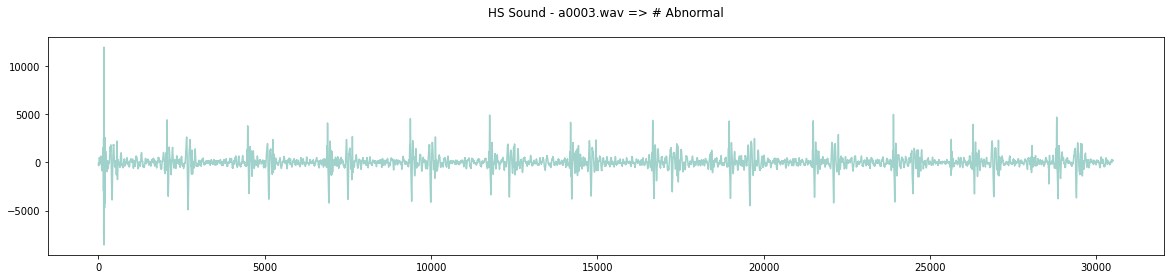

Low Pass filtered


In [17]:
[audio,_] = HS_plot(2,0,30500)

new = audio.high_pass_filter(200)

path = "edited/" + "temp.wav"
new.export(path , "wav")

print("Low Pass filtered")
IPython.display.Audio(path)


In [ ]:
audio

In [ ]:
[x,s] = HS_plot('edited/temp.wav',0,40500)

In [1]:
[audio,_] = HS_plot(99,0,550)
audio

NameError: name 'HS_plot' is not defined

In [94]:
def plot_fft(x):
    file = x
    path = x
    
    if(type(x)==int):
        file = wav_files[x]
        path = dataset_path + '/training-a/' +  file 
        spf  = wave.open(path, "r")

        meta_data = dataset_path + '/training-a/' + file[:-3] + 'hea'

        with open(meta_data) as f:
            content = f.readlines()
    else:
        spf  = wave.open(path , "r")
        content = ['N/A']
    
    print()
    # Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.frombuffer(signal, dtype='int16')
    
    N = len(signal)
    T = 1/2000
    # sample spacing

    w = blackman(N)
    

    yf = scipy.fft(signal*w)

    xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

    plt.figure(figsize=(20,8))
    plt.title("FFT of HS Sound - " + file + ' => '+ content[-1])
    
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.show()

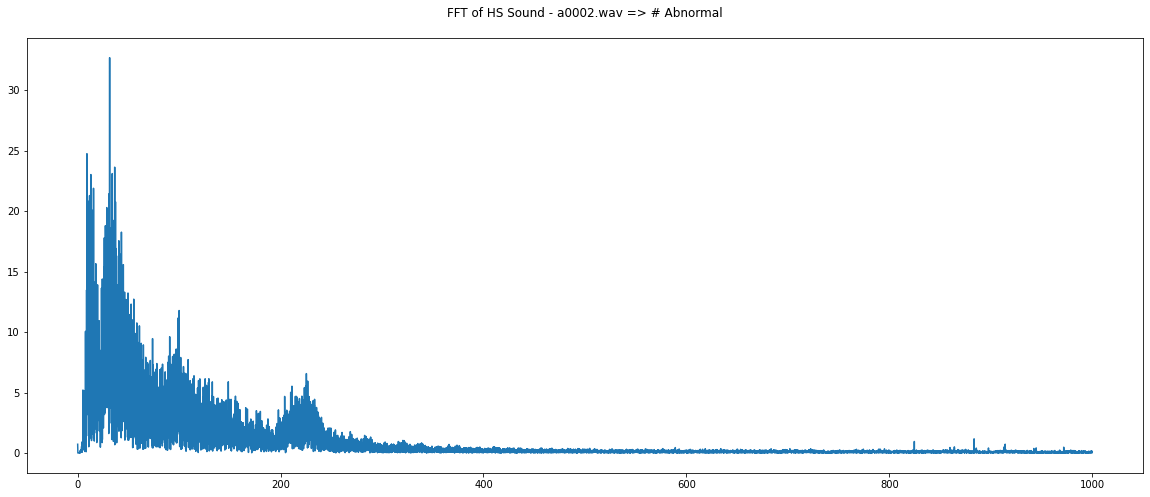

In [95]:
plot_fft(1)

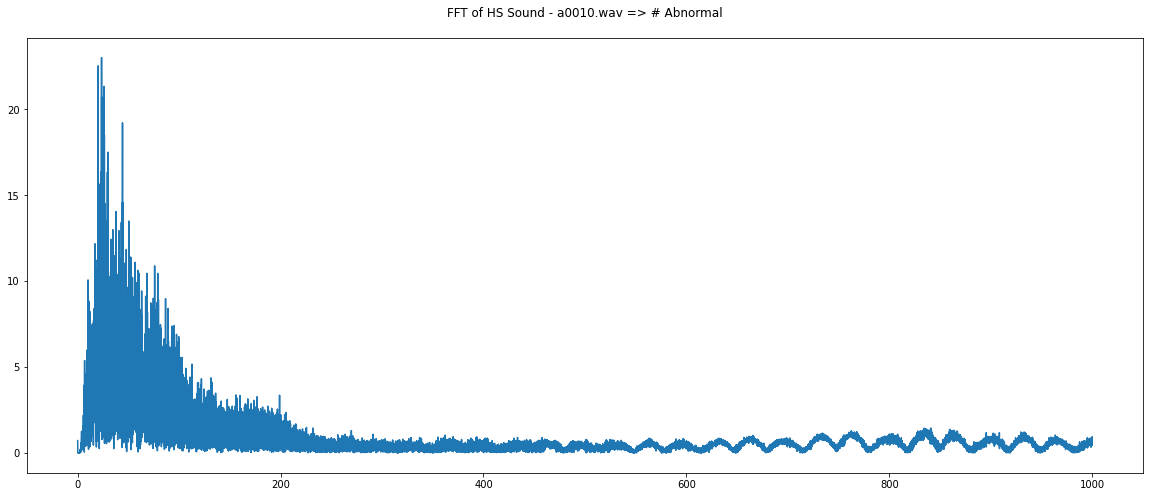

In [96]:
plot_fft(9)

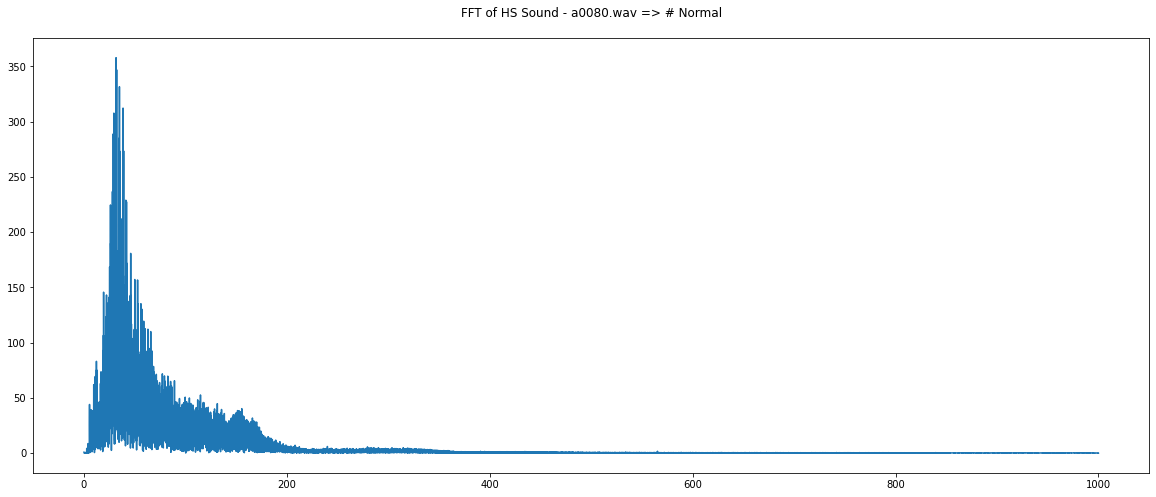

In [97]:
plot_fft(79)

UnboundLocalError: local variable 'ee' referenced before assignment

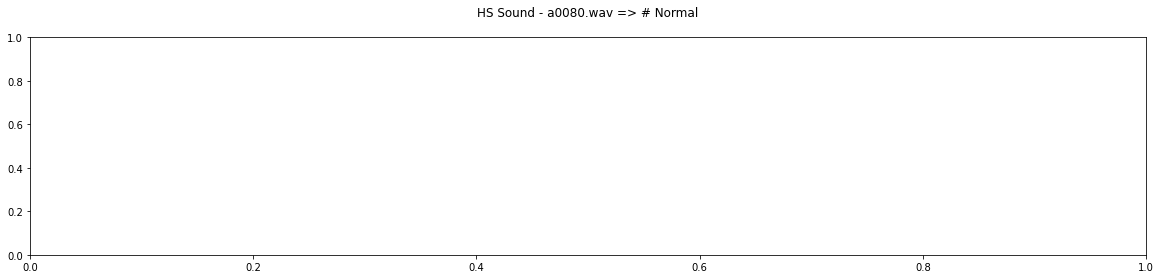

In [109]:
[audio,_] = HS_plot(79,0,10000)
audio

In [111]:
def plot_pcg_ecg(x,s=0,e=-1):
    rec = wav_files[x][:-4]

    record = wfdb.rdrecord(dataset_path + '/training-a/'+rec) 
    pcg_p = wfdb.processing.find_local_peaks(record.p_signal[:,0],1000) 
    ecg_p = wfdb.processing.find_local_peaks(record.p_signal[:,1],300)
    
    #pcg_p = wfdb.processing.find__peaks(record.p_signal[:,0])[0] #0 for hard peaks 
  
    
    peaks = [pcg_p , ecg_p]
    
    wfdb_custom.plot_wfdb(s,e,peaks,record=record, title='Record ' + rec + ' from PhysioNet Challenge 2016' + ' => ' + record.__dict__['comments'][0],figsize=(20,10), time_units = 'samples',ecg_grids=[1]) 
    display(record.__dict__)
    
    





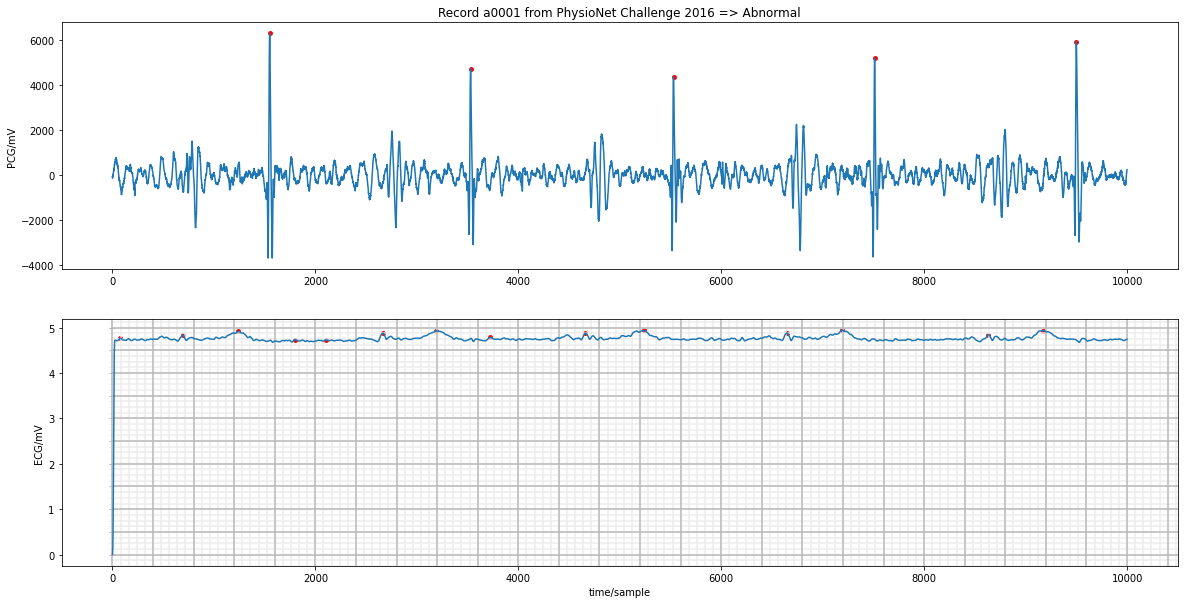

{'record_name': 'a0001',
 'n_sig': 2,
 'fs': 2000,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 71332,
 'base_time': None,
 'base_date': None,
 'comments': ['Abnormal'],
 'sig_name': ['PCG', 'ECG'],
 'p_signal': array([[-6.900e+01,  0.000e+00],
        [-1.350e+02,  1.500e-02],
        [-1.040e+02,  4.600e-02],
        ...,
        [-2.850e+02,  4.879e+00],
        [-2.570e+02,  4.877e+00],
        [-1.870e+02,  4.878e+00]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a0001.wav', 'a0001.dat'],
 'fmt': ['16', '16'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [44, None],
 'adc_gain': [1.0, 1000.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [16, 16],
 'adc_zero': [0, 0],
 'init_value': [0, 0],
 'checksum': [0, 367],
 'block_size': [0, 0]}

In [114]:
plot_pcg_ecg(0,0,10000)

In [42]:
def increase_volume(x,db=20):
    song = AudioSegment.from_wav(dataset_path + '/training-a/'+wav_files[0])
    song = song + db
    
    path = "edited/" + wav_files[0]
    song.export("edited/" + wav_files[0] , "wav")

    return IPython.display.Audio(path)

In [43]:
increase_volume(0)


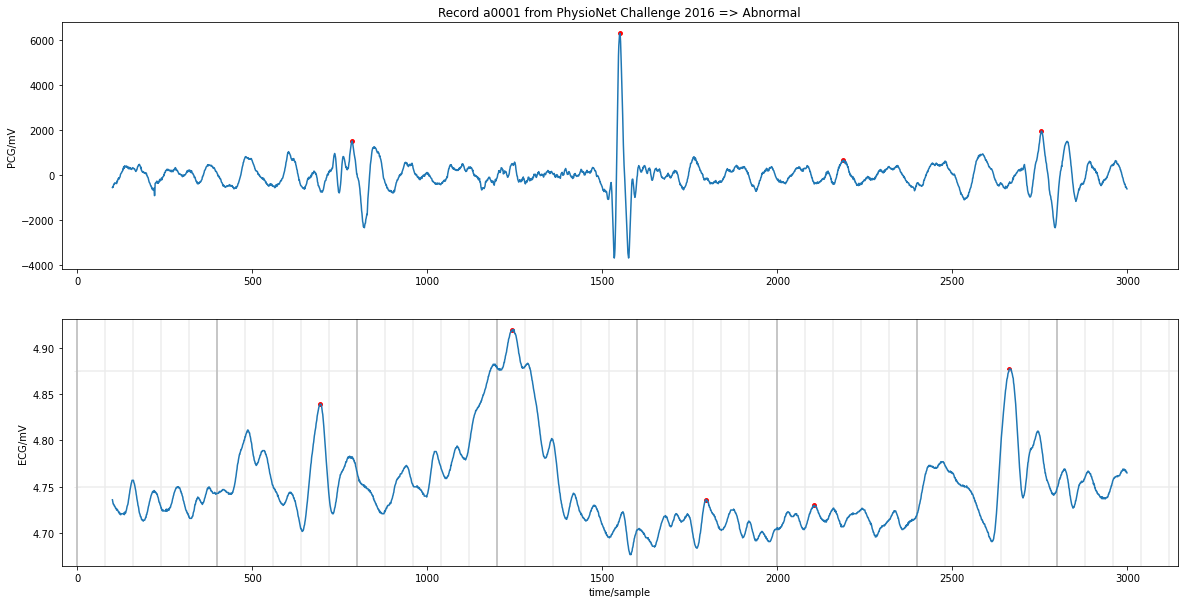

{'record_name': 'a0001',
 'n_sig': 2,
 'fs': 2000,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 71332,
 'base_time': None,
 'base_date': None,
 'comments': ['Abnormal'],
 'sig_name': ['PCG', 'ECG'],
 'p_signal': array([[-6.900e+01,  0.000e+00],
        [-1.350e+02,  1.500e-02],
        [-1.040e+02,  4.600e-02],
        ...,
        [-2.850e+02,  4.879e+00],
        [-2.570e+02,  4.877e+00],
        [-1.870e+02,  4.878e+00]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a0001.wav', 'a0001.dat'],
 'fmt': ['16', '16'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [44, None],
 'adc_gain': [1.0, 1000.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [16, 16],
 'adc_zero': [0, 0],
 'init_value': [0, 0],
 'checksum': [0, 367],
 'block_size': [0, 0]}

In [44]:
plot_pcg_ecg(0,100,3000)

In [ ]:
dt = 1/300  # 300 Hz sampling
frequencies = pywt.scale2frequency('cmor1.5-1.0', [1, 2, 3, 4]) / dt
frequencies

In [ ]:
#wavlist = pywt.wavelist(kind='continuous')
#wavlist

In [ ]:
# Obtaining CWT and Plotting using scaleogram library
scg.set_default_wavelet('cmor1.5-1.0')
# Useful bandwidth of ECG = (0.5,100)Hz
# The higher the scale applied to the transform, the wavelet becomes more sensitive to low frequencies of
#    the given signal
# Increased scale thus contributes to the smoothening of the X axis
scales = np.arange(2, 450)

In [ ]:
def plot_wavelet(ecg,fs,scales,xlim,title):
    ''' Computing CWT and Plotting Scalogram '''
    # fs - should be a float
    # title - figpath+filename
    t = np.array(range(len(ecg)-1))/fs
    cwt = scg.CWT(t, ecg,scales)
    scg.cws(cwt, figsize = (10,5),xlim = xlim, yaxis='frequency',yscale = 'log',title = title,cscale='linear',cbar=None)